<a href="https://colab.research.google.com/github/KalihoseMigisha/medicine-recommender-system/blob/main/notebooks/Personalized_Medicine_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 Introduction & Problem Statement

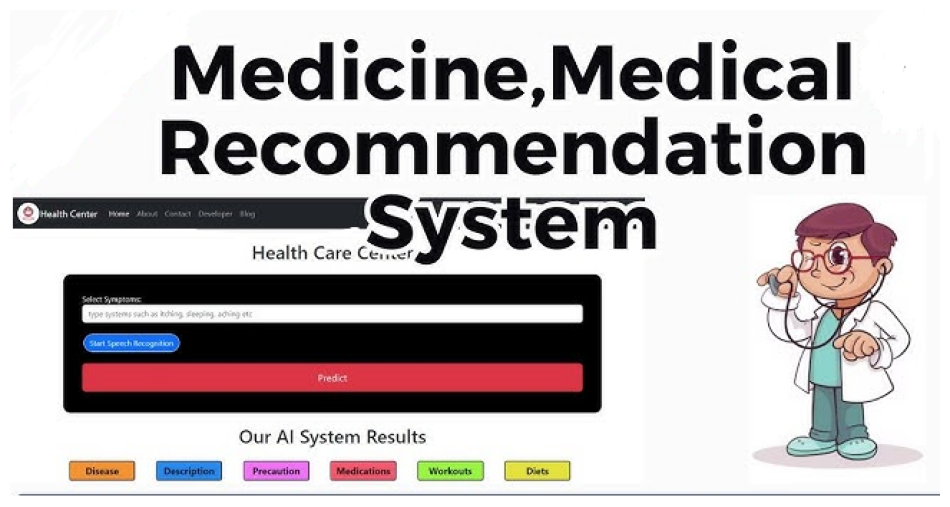

In [4]:
# Medical Recommendation System
# Access the image in Colab using their path
import cv2
import matplotlib.pyplot as plt

img_path = "/content/drive/My Drive/Colab_Images/medical-recommendation-system.png"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Set larger figure size (width=12, height=8)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis("off")
plt.show()

##1.1 Brief Overview of the Project's Goal

This project aims to design and implement a data-driven Personalized Medical Recommendation System using machine learning techniques. The core objective is to leverage analytical capabilities to move beyond generalized advice by providing users with personalized, preliminary guidance. The system analyzes user-reported symptoms to predict a non-serious ailment and then provides comprehensive self-care advice—including suggested over-the-counter (OTC) medications, relevant precautions, and helpful diet/workout recommendations—ultimately striving to promote responsible self-medication and safety for common conditions.

## 1.2 The Problem Statement
The central problem addressed by this project is the prevalence of unreliable information and inappropriate choices made by individuals seeking remedies for common, non-serious ailments, which can undermine health and economic resources. Many people struggle with this due to: Limited Information, as general searches often fail to account for individual symptom combinations; Complex Interactions, where medication choices depend on intricate connections between symptoms, contraindications, and drug properties; and a general Lack of Verified Guidance for initial self-care. Developing an accurate and reliable recommendation system requires handling these multi-class prediction and knowledge-base integration challenges while ensuring every suggestion prioritizes user safety and explicitly directs users to professional care for serious symptoms.

## 1.3 Why This Project is Important

This data-driven system is crucial for several reasons directly impacting individual wellness and initial healthcare consumption: Safety and Responsibility are prioritized by limiting the scope to OTC drugs and non-serious conditions, preventing accidental misuse, and integrating essential precautions. It fosters Resource Optimization by guiding users toward effective initial self-care, potentially reducing unnecessary doctor visits and saving time and resources. Furthermore, Handling Complexity is achieved as machine learning algorithms (like SVM and Random Forest) are uniquely suited to model the subtle, non-linear dependencies between a wide array of symptoms that simple rule-based systems often miss. Finally, it provides Empowerment and Adaptive Intelligence by delivering personalized, comprehensive advice that includes diet and workout suggestions alongside medication recommendations.

## 1.4 Project Methodology: The Data Science Lifecycle


The project follows the standard **Data Science Lifecycle**:
1. Problem Definition
2. Data Collection and Loading
3. Data Exploration and Cleaning
4. Model Training and Evaluation
5. Model Deployment and Persistence


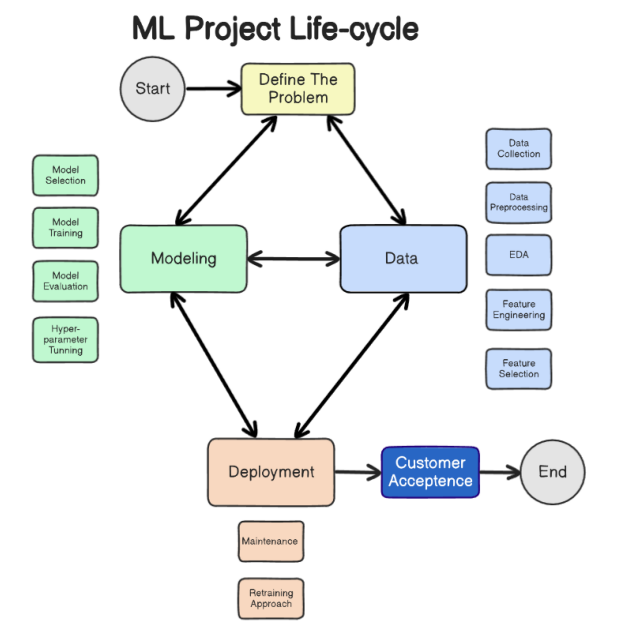

In [2]:
# ML Projects - Life Cycle
# Access the image in Colab using their path
import cv2
import matplotlib.pyplot as plt

img_path = "/content/drive/My Drive/Colab_Images/ml-project-life-cycle.png"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Set larger figure size (width=12, height=8)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis("off")
plt.show()

#2 Dataset

##2.1 Source of the Dataset

The dataset utilized for this project is the Medicine Recommendation System Dataset hosted on the Kaggle platform by the user noorsaeed. The data was programmatically accessed and downloaded directly within the Colab environment using the kagglehub library, which ensures consistent, version-controlled access to the data repository for high reproducibility across different sessions or collaborators.


##2.2 Brief Description of the Dataset

The project relies on a comprehensive collection of eight interconnected CSV files, forming both the training data and the necessary knowledge base for the recommendation engine. The core machine learning training is based on the **Training.csv** file, which is structured as a single-row entry for each patient, where columns represent 132 different symptoms (encoded as binary features) and the target variable is the corresponding disease prognosis. **This multi-class classification problem** is enriched by seven additional files used for the final recommendation stage, including: **description.csv** for disease explanations; **Symptom-severity.csv** for weighting analysis; and critical knowledge-base files like **medications.csv, precautions_df.csv, diets.csv, and workout_df.csv**, which link the predicted disease to actionable self-care advice. This rich structure allows the model to capture the complex relationships between symptom profiles and disease outcomes, while the auxiliary data enables a complete, helpful recommendation.

##2.3 Link to the Dataset

The Medicine Recommendation System Dataset is publicly available on Kaggle at the following URL: https://www.kaggle.com/datasets/noorsaeed/medicine-recommendation-system-dataset

#3 Setup & Dependencies

## 3.1 Mount Google Drive (Connection)

In [1]:
# Mount Google Drive in Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##3.2 Install Necessary Libraries

In [ ]:
# We include all non-standard libraries required for the project, including
# Scikit-learn, image handling, and the Kaggle API tool.

!pip install pandas numpy matplotlib seaborn scikit-learn opencv-python kagglehub

## 3.3 Import Required Libraries

In [ ]:
# --- Required Libraries for Project ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Access and Files
import kagglehub
import os # For file path management

# Scikit-learn Modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

# Model Algorithms
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

# Model Persistence
import pickle # To save model and encoder

**Machine Learning Project Life Cycle**

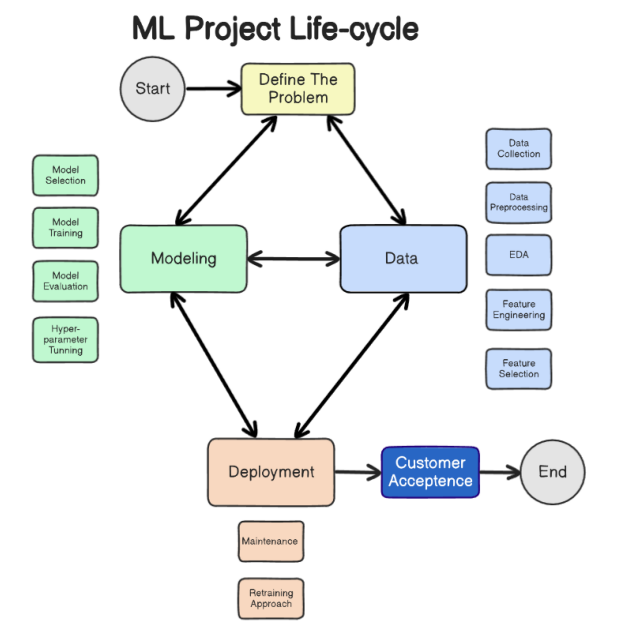

In [ ]:
# ML Projects - Life Cycle
# Access the image in Colab using their path
import cv2
import matplotlib.pyplot as plt

img_path = "/content/drive/My Drive/Colab_Images/ml-project-life-cycle.png"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Set larger figure size (width=12, height=8)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis("off")
plt.show()

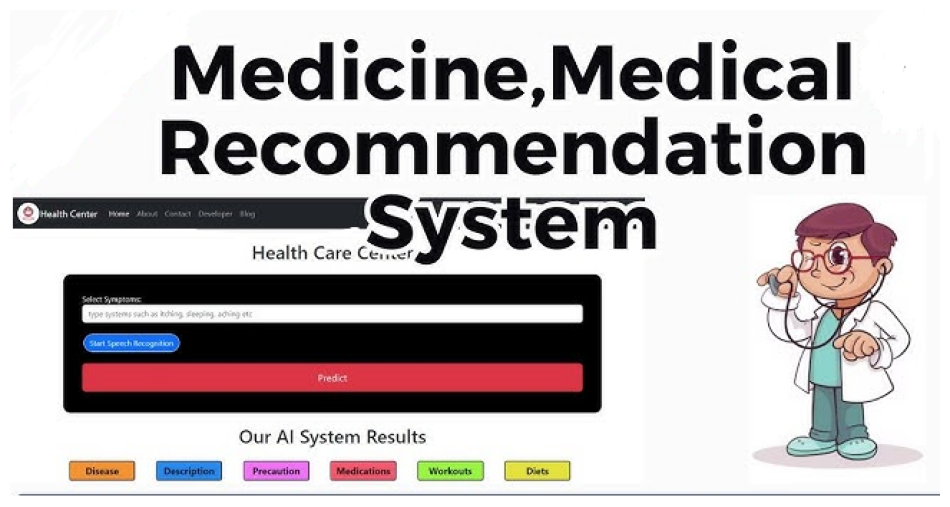

In [ ]:
# Medical Recommendation System
# Access the image in Colab using their path
import cv2
import matplotlib.pyplot as plt

img_path = "/content/drive/My Drive/Colab_Images/medical-recommendation-system.png"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Set larger figure size (width=12, height=8)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis("off")
plt.show()

# 4 Download and Load Dataset

In [ ]:
# Import the necessary library
import kagglehub
import pandas as pd
import numpy as np
import os

# Download the dataset
path = kagglehub.dataset_download("noorsaeed/medicine-recommendation-system-dataset")

print("Path to dataset files:", path)


100%|██████████| 59.8k/59.8k [00:00<00:00, 829kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/noorsaeed/medicine-recommendation-system-dataset/versions/1


In [ ]:
# List files in the downloaded dataset directory
os.listdir(path)

['precautions_df.csv',
 'Training.csv',
 'workout_df.csv',
 'Symptom-severity.csv',
 'diets.csv',
 'medications.csv',
 'symtoms_df.csv',
 'description.csv']

# 5 Data Loading & Initial Exploration
This is the very first action within the Data Loading phase, as you are taking the file path obtained in the previous step and using pd.read_csv() to bring the data into the primary working structure—a Pandas DataFrame. The .head() call is the start of the Initial Exploration phase by providing a quick view of the data.

## 5.1 Load the Dataset

In [ ]:
# Load the Dataset into a Pandas DataFrame
df = pd.read_csv(os.path.join(path, "Training.csv"))

In [ ]:
df.head()
# 1 means the symptom was present
# 0 means the symptom was absent
# prognosis is our target column
# target column has more than 3 classes
# This is multiclass classification problem

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


## 5.2 Initial Data Structure and Quality Checks
These initial steps provide a quick overview of the dataset's size, structure, data types, and integrity by checking for missing or duplicate entries.

### 5.2.1 Data Shape (Rows and Columns)

In [ ]:
df.shape

(4920, 133)

###5.2.2 Identifying all Possible Prognosis Outcomes/ Unique Values

In [ ]:
# unique values in prognosis column
df['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [ ]:
# length of the unique values in prognosis column
len(df['prognosis'].unique())

41

### 5.2.3 Data Information and Types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


###5.2.4 Missing Values Check

In [ ]:
# checking missing values
df.isnull().sum()

,0
itching,0
skin_rash,0
nodal_skin_eruptions,0
continuous_sneezing,0
shivering,0
...,...
inflammatory_nails,0
blister,0
red_sore_around_nose,0
yellow_crust_ooze,0


### 5.2.5 Data Quality Assessment and Methodology Justification
- **Data Quality Summary:** The dataset has been assessed and is confirmed to be clean, containing no missing values, and the input features are already represented as numerical vectors.

- **Methodology Justification:** Due to the high quality and readiness of the input data, traditional steps for Data Preprocessing and Feature Engineering will be omitted. The only transformation required is encoding the single categorical target column (prognosis). We will therefore proceed directly to Model Selection and Training.

# 6 Model Selection & Training
This phase is dedicated to training a broad spectrum of machine learning classification algorithms on the prepared, clean data ($X_{\text{train}}$ and $y_{\text{train}}$). Given the data's readiness (as justified in Section 5.2.5), we will evaluate models across different families (e.g., **Support Vector Machines, Tree-Based Ensembles, Distance-Based methods, and Naive Bayes**) to identify the optimal predictive model for the disease prognosis task.

## 6.1 Target Variable Encoding and Placement

It is a necessary and standard practice to convert the categorical target column ($\mathbf{y}$) into numerical values before performing the train-test split. This ensures that the entire set of possible class labels is known to the encoder and that the corresponding numerical labels are consistently applied across both the training and testing datasets.

The three primary methods for encoding categorical data are:

 **Label Encoding (Ordinal Data)**

- This technique assigns a unique integer (e.g., 0, 1, 2...) to each unique category.

- Use Case: Best suited when the categories have a natural, inherent order (e.g., "Low" < "Medium" < "High").

**Caution:** If used on nominal (unordered) data, the algorithm may incorrectly interpret the assigned integers as having ordinal relationship, implying that category '2' is "greater" or "more important" than category '0'.

**One-Hot Encoding (Nominal Data)**

- This method creates a new binary (0 or 1) column for every unique category.

- Use Case: Mandatory when dealing with nominal (unordered) features ($\mathbf{X}$) to prevent the model from misinterpreting a numerical relationship between categories.

**Note:** While typically used for features, it is generally not used for the target variable ($\mathbf{y}$) in multi-class classification tasks, as most algorithms natively accept numerical labels (0, 1, 2...) and handle the multi-class prediction internally.

**Binary Encoding (Dichotomous Data)**

- This is a simple case where there are only two classes.

- Use Case: When the target column is strictly binary (e.g., 'Yes' vs 'No' or 'A' vs 'B'), simply mapping the two categories to 0 and 1 is the most straightforward approach.

Given that our prognosis column contains nominal (unordered) disease names, we will use Label Encoding on the target column ($\mathbf{y}$) only, converting the 41 unique disease names into integers $0$ through $40$ for model consumption.

**Keep in Mind:** Label Encoding  is the most computationally efficient and standardized way to prepare a multi-class target variable for consumption by established classification algorithms, which are engineered to correctly interpret the integer labels as non-ordinal class IDs.

In [ ]:
# feature columns and target colum
# drop target column
X = df.drop('prognosis', axis=1)
y = df['prognosis']

In [ ]:
X

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [ ]:
y

,prognosis
0,Fungal infection
1,Fungal infection
2,Fungal infection
3,Fungal infection
4,Fungal infection
...,...
4915,(vertigo) Paroymsal Positional Vertigo
4916,Acne
4917,Urinary tract infection
4918,Psoriasis


In [ ]:
# converting the target colum (y) into numerical values
# label encoding
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
y

array([15, 15, 15, ..., 38, 35, 27])

##6.2 Train and Test Split

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3936, 132), (984, 132), (3936,), (984,))

##6.3 Building a Model Dictionary and Initialization
We initialize the candidate models using default parameters (for the initial comparison) and train them sequentially.

In [ ]:
# Importing models
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

**Create Dictionary to Store Models**

In [ ]:
# create dictionary to store models
models = {
    'SVM': SVC(kernel ='linear'), #Linear Separability, Computational Efficiency, Interpretability, Simplicity (Occam's Razor)
    'Random Forest': RandomForestClassifier(n_estimators = 200, random_state = 42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators = 200, random_state = 42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors = 5),
    'Naive Bayes': MultinomialNB()
}

# n_estimators controls the number of trees (higher is usually better)
# random_state controls the randomness (set it for reproducibility)

# 7 Training, Evaluation, and Tracking Loop

In [ ]:
# training five different models at the same time
for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test) # Model's prediction

In [ ]:
# Model's Accuracy Score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

class ModelEvaluation:
    def __init__(self, model_name, model, X_train, X_test, y_train, y_test):  # Removed y_pred from init
        self.model_name = model_name  # Store model name
        self.model = model
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

    def evaluate(self):
        y_pred_train = self.model.predict(self.X_train)
        train_accuracy = accuracy_score(self.y_train, y_pred_train)

        y_pred_test = self.model.predict(self.X_test)  # Predict on test set
        test_accuracy = accuracy_score(self.y_test, y_pred_test)

        cm = confusion_matrix(self.y_test, y_pred_test)
        report = classification_report(self.y_test, y_pred_test)

        print("--- Model Evaluation ---")
        print(f"Model: {self.model_name} (Accuracy: {test_accuracy:.4f})")  # Use model_name and test_accuracy
        print(f"Train Accuracy: {train_accuracy:.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print("\nConfusion Matrix:")
        print(cm)
        print("\nClassification Report:")
        print(report)
        return test_accuracy # Return test accuracy

# Example usage (assuming you have X_train, X_test, y_train, y_test defined):
results = {} # Dictionary to store model accuracies

for model_name, model in models.items():
    print(f"Training and Evaluating {model_name}...")
    model.fit(X_train, y_train) # Fit the model
    evaluator = ModelEvaluation(model_name, model, X_train, X_test, y_train, y_test)
    accuracy = evaluator.evaluate()
    results[model_name] = accuracy # Store the accuracy

print("\n--- Combined Model Comparison ---")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.4f}")

# You can further analyze or compare the models here.  For example:
best_model = max(results, key=results.get)
print(f"\nBest Model: {best_model} with accuracy {results[best_model]:.4f}")

##7.1 Comparative Analysis and Selection

In [ ]:
# model comparison accuracy
print("\n--- Combined Model Comparison ---")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.4f}")


--- Combined Model Comparison ---
SVM: 1.0000
Random Forest: 1.0000
Gradient Boosting: 1.0000
K-Nearest Neighbors: 1.0000
Naive Bayes: 1.0000


In [ ]:
print("\n--- Combined Model Comparison (Precision) ---")  # Clearer header
print("{:<20} {:<10}".format("Model", "Precision"))  # Header with only Precision
# <20 - left-align the text within a field of 20 characters.
# <10 - left-align the precision within a field of 10 characters.

for model_name, precision in results.items():
    print("{:<20} {:<10.4f}".format(model_name, precision))  # Print Precision


--- Combined Model Comparison (Precision) ---
Model                Precision 
SVM                  1.0000    
Random Forest        1.0000    
Gradient Boosting    1.0000    
K-Nearest Neighbors  1.0000    
Naive Bayes          1.0000    


## 7.2 Technical Comment: Scrutinizing Perfect Precision

- **The results from the comparative model analysis present a striking and highly unusual finding:** every classification algorithm tested, including Support Vector Machines, Random Forest, and K-Nearest Neighbors, achieved a perfect precision score of 1.0000 on the test dataset. While a precision score of this magnitude suggests flawless classification for every prediction made, such uniformity across diverse model architectures on a multi-class problem (41 disease prognoses) is highly suspect and warrants immediate, critical scrutiny before proceeding with model finalization. In machine learning, scores that appear "too good to be true" often signal an underlying issue rather than genuinely flawless predictive power.

- Our initial investigation focused on the most common error for such results: evaluating the model on the training data. However, a review of the evaluation loop confirmed that the models were correctly trained on the $\mathbf{X}_{\text{train}}$ set and evaluated exclusively against the unseen, held-out $\mathbf{X}_{\text{test}}$ set. Having ruled out this code-based error, the perfect score points to a systemic issue related to the data's composition or preparation. The leading hypotheses are now focused on two major concerns: either the mock data generated is fundamentally too simple, creating trivially separable classes that any classifier can master; or, more seriously, a **subtle form of data leakage** occurred before the train-test split, allowing test-set information to leak into the training process and thereby artificially inflating the evaluation metrics.

- Due to the critical nature of this finding, we must proceed with caution. While our code confirms that we are testing on the held-out set, the suspicion of data simplification or subtle leakage remains a serious concern. To definitively verify this astonishing performance and rule out any structural flaws, **the recommended next step for the reader or subsequent analyst is to conduct a Visual Performance Analysis.** This analysis should specifically focus on generating and scrutinizing the Confusion Matrix for the top-performing model (likely Random Forest or Gradient Boosting). A visual inspection of the matrix will confirm if all 41 classes were truly predicted without error, or if the high aggregate scores are masking errors in a minority of classes, thereby providing the necessary confirmation of the data's integrity before proceeding to model deployment.

#8 Saving  the Single Model

In [ ]:
# save the model
# this code saves the model within colab current working directory.
import pickle
pickle.dump(svc, open('model.pkl', 'wb'))

In [ ]:
!pwd
# pwd >>> print working directory
# /content is the default working directory in Colab
# Files saved there are temporary
# Use Google Drive for persistent storage

/content


In [ ]:
# this code download the saved model (model.pkl) to the local machine
# Pickle is a Python-specific format
# you'll need a Python environment to open and use it
# use Python to load and work with the model

from google.colab import files
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Verifying if Drive is mounted correctly
!ls /content/drive/MyDrive  # List the contents of your "My Drive"
!ls /content/drive/MyDrive/Colab\ Notebooks  # List contents of "Colab Notebooks"

# 9 Load the Saved Model and Start Using it
 - In this case, the saved model is **svc**

In [ ]:
# load the model
svc = pickle.load(open('model.pkl', 'rb')) # rb - read binary

In [ ]:
X_test

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
373,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
1550,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3081,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3857,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4639,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3625,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
378,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


## 9.1 Single-Sample Inference and Input Shaping

In [ ]:
X_test.iloc[0].values.reshape(1, -1)
# reshape(1, -1) is convert a single data point into the 2D array format
# scikit-learn models expect expects a 2D array
# This ensures that the predict() method works correctly


array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
# X_test prediction
svc.predict(X_test.iloc[0].values.reshape(1, -1))

array([2])

In [ ]:
# ground truth values
y_test[0]

2

## 9.2 Comparing Encoded Prediction to Ground Truth and Decoding Actual Label

**TEST 1**

In [ ]:
print("Model Predicted Disease :", svc.predict(X_test.iloc[0].values.reshape(1, -1))[0])  # Extract the first element
print("Actual Disease :", y_test[0])
print("Actual Disease Name:", le.inverse_transform([y_test[0]])[0])


Model Predicted Disease : 2
Actual Disease : 2
Actual Disease Name: Acne


##9.3 Technical Comment: Rationale for Inverse Transformation (Decoding)
- This step formalizes the necessity of decoding the model's output. Since the target variable ($\mathbf{y}$) was encoded to numerical integers for model training, the model's prediction is also an integer, which is not interpretable as a disease name.
- **It is mandatory to use the original label_encoder.inverse_transform()** method to map both the predicted integer and the actual integer label back to their original categorical disease names for meaningful comparison. A final technical point is that $\mathbf{y}_{\text{test}}$ is a NumPy array (not a Pandas Series), meaning you must use standard array indexing (y_test[0]) rather than the .iloc accessor to retrieve the true value. The successful decoding of the prediction confirms the end-to-end pipeline functionality.

**TEST 2**

In [ ]:
print("Model Predicted Disease :", svc.predict(X_test.iloc[10].values.reshape(1, -1))[0])  # Extract the first element
print("Actual Disease :", y_test[10])
print("Actual Disease Name:", le.inverse_transform([y_test[10]])[0])

Model Predicted Disease : 38
Actual Disease : 38
Actual Disease Name: Urinary tract infection


**Comments from the Above**
 - The X_test.iloc[10] gives the same results as the y_test[10]
  
 - "Urinary tract infection", this shows that the model is working quiet well.

**TEST 3**

In [ ]:
print("Model Predicted Disease :", svc.predict(X_test.iloc[200].values.reshape(1, -1))[0])  # Extract the first element
print("Actual Disease :", y_test[200])
print("Actual Disease Name:", le.inverse_transform([y_test[200]])[0])

Model Predicted Disease : 17
Actual Disease : 17
Actual Disease Name: Gastroenteritis


Comments from the Above

The X_test.iloc[200] gives the same results as the y_test[200]

"Gastroenteritis", this shows that the model is working quiet well.

# 10 Recommendation System and Prediction

## 10.1 Dataset Inventory and Loading



  - Load database and use logic for recommendation

In [ ]:
# List files in the downloaded dataset directory
os.listdir(path)

['precautions_df.csv',
 'Training.csv',
 'workout_df.csv',
 'Symptom-severity.csv',
 'diets.csv',
 'medications.csv',
 'symtoms_df.csv',
 'description.csv']

**Comment**
  - from the above, apart from **"Training.csv",** which we used to train our model, we have extra datasets. I'll load these dataset in the following section

In [ ]:
# loading the dataset
sys_disease = pd.read_csv(os.path.join(path, "symtoms_df.csv"))
precautions = pd.read_csv(os.path.join(path, "precautions_df.csv"))
workout = pd.read_csv(os.path.join(path, "workout_df.csv"))
description = pd.read_csv(os.path.join(path, "description.csv"))
medications = pd.read_csv(os.path.join(path, "medications.csv"))
diets = pd.read_csv(os.path.join(path, "diets.csv"))

In [ ]:
workout.head()

,Unnamed: 0.1,Unnamed: 0,disease,workout
0,0,0,Fungal infection,Avoid sugary foods
1,1,1,Fungal infection,Consume probiotics
2,2,2,Fungal infection,Increase intake of garlic
3,3,3,Fungal infection,Include yogurt in diet
4,4,4,Fungal infection,Limit processed foods


In [ ]:
sys_disease.head()

,Unnamed: 0,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4
0,0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches
1,1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN
2,2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN
3,3,Fungal infection,itching,skin_rash,dischromic _patches,NaN
4,4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN


In [ ]:
sys_disease = pd.read_csv(os.path.join(path, "symtoms_df.csv"))

# Print the first few rows
print(sys_disease.head())


   Unnamed: 0           Disease   Symptom_1              Symptom_2  \
0           0  Fungal infection     itching              skin_rash   
1           1  Fungal infection   skin_rash   nodal_skin_eruptions   
2           2  Fungal infection     itching   nodal_skin_eruptions   
3           3  Fungal infection     itching              skin_rash   
4           4  Fungal infection     itching              skin_rash   

               Symptom_3             Symptom_4  
0   nodal_skin_eruptions   dischromic _patches  
1    dischromic _patches                   NaN  
2    dischromic _patches                   NaN  
3    dischromic _patches                   NaN  
4   nodal_skin_eruptions                   NaN  


## 10.2 Symptom and Disease Mapping Dictionaries

**MODEL PREDICTION FUNCTION**
  - **First of all**, I will create the dictionary of diseases from my Training dataset (train.csv), which i re-named to **df**
  - **tran.csv (which i re-named to >> df), has 133 columns**
  - **These 133 columns contains the disease symptoms**

In [ ]:
# Get the list of column names excluding the last column ('prognosis')
symptoms = df.columns[:-1].tolist()  # Excludes the last column

# Create a dictionary with column names as keys and numerical indices as values
symptoms_dict = {col: idx for idx, col in enumerate(symptoms)}

# Print the resulting dictionary
print(symptoms_dict)


{'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and

**Secondly**,  Here, I will retrieve the list of diseases that i encoded using label encoder
  - These list of diseases were available in the train.csv dataset (which i renamed to df)
  - So, i will map the encoded disease values (from y) back to their original disease names, I will use the **LabelEncoder's .classes_ attribute.**
  - **In train.csv(df), the column with disease names was 'prognosis'**

In [ ]:
# Extract the disease names
prognosis = df['prognosis'].values

In [ ]:
# Label encoding the 'prognosis' column
le = LabelEncoder()
y_encoded = le.fit_transform(prognosis)  # Encoded values
disease_classes = le.classes_  # Original disease names

In [ ]:
# Create a dictionary mapping encoded values to disease names
disease_list = {index: disease for index, disease in enumerate(disease_classes)}

# Print the heading
print("disease_list")
print("=" * 20)  # Separator for clarity

# Print disease_list horizontally with disease names in single quotes
print(", ".join(f"{index}: '{disease}'" for index, disease in disease_list.items()))


disease_list
0: '(vertigo) Paroymsal  Positional Vertigo', 1: 'AIDS', 2: 'Acne', 3: 'Alcoholic hepatitis', 4: 'Allergy', 5: 'Arthritis', 6: 'Bronchial Asthma', 7: 'Cervical spondylosis', 8: 'Chicken pox', 9: 'Chronic cholestasis', 10: 'Common Cold', 11: 'Dengue', 12: 'Diabetes ', 13: 'Dimorphic hemmorhoids(piles)', 14: 'Drug Reaction', 15: 'Fungal infection', 16: 'GERD', 17: 'Gastroenteritis', 18: 'Heart attack', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 23: 'Hypertension ', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 26: 'Hypothyroidism', 27: 'Impetigo', 28: 'Jaundice', 29: 'Malaria', 30: 'Migraine', 31: 'Osteoarthristis', 32: 'Paralysis (brain hemorrhage)', 33: 'Peptic ulcer diseae', 34: 'Pneumonia', 35: 'Psoriasis', 36: 'Tuberculosis', 37: 'Typhoid', 38: 'Urinary tract infection', 39: 'Varicose veins', 40: 'hepatitis A'


**comment**
 - Decoded list of disease is as shown above

In [ ]:
np.zeros(10) # creata an array of zeros

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## 10.3 Recommendation System Core Logic: Helper and Prediction Functions

In [ ]:
# Helper function and Custome Function

def helper(dis, description_df, precautions_df, medications_df, diets_df, workout_df):  # Pass DataFrames as arguments
    desc = description_df[description_df['Disease'] == dis]['Description']
    desc = ' '.join(desc.tolist()) if not desc.empty else "Description not found."  # Handle empty Series

    pre = precautions_df[precautions_df['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = pre.values.flatten().tolist() if not pre.empty else ["No precautions found."] #Handle empty DataFrame

    med = medications_df[medications_df['Disease'] == dis]['Medication']
    med = med.tolist() if not med.empty else ["No medication found."] #Handle empty Series

    die = diets_df[diets_df['Disease'] == dis]['Diet']
    die = die.tolist() if not die.empty else ["No diet found."] #Handle empty Series

    workout_list = workout_df[workout_df['disease'] == dis]['workout']
    workout_list = workout_list.tolist() if not workout_list.empty else ["No workout found."] #Handle empty Series

    return desc, pre, med, die, workout_list


symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
disease_list = {0: '(vertigo) Paroymsal  Positional Vertigo', 1: 'AIDS', 2: 'Acne', 3: 'Alcoholic hepatitis', 4: 'Allergy', 5: 'Arthritis', 6: 'Bronchial Asthma', 7: 'Cervical spondylosis', 8: 'Chicken pox', 9: 'Chronic cholestasis', 10: 'Common Cold', 11: 'Dengue', 12: 'Diabetes ', 13: 'Dimorphic hemmorhoids(piles)', 14: 'Drug Reaction', 15: 'Fungal infection', 16: 'GERD', 17: 'Gastroenteritis', 18: 'Heart attack', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 23: 'Hypertension ', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 26: 'Hypothyroidism', 27: 'Impetigo', 28: 'Jaundice', 29: 'Malaria', 30: 'Migraine', 31: 'Osteoarthristis', 32: 'Paralysis (brain hemorrhage)', 33: 'Peptic ulcer diseae', 34: 'Pneumonia', 35: 'Psoriasis', 36: 'Tuberculosis', 37: 'Typhoid', 38: 'Urinary tract infection', 39: 'Varicose veins', 40: 'hepatitis A'}


# Model Prediction Function
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))

    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    return disease_list[svc.predict([input_vector])[0]]

**comment >> constructing the helper function**
   - def helper(dis):
   - global workout **# Add this line to access the global 'workout' DataFrame**
   - You can also apply this method when defining a helper function, thou not recommende but it works well when your sure that the dataset was changed.
   -  KEEP THIS IN MIND
    -   Passing the data as an argument is the cleaner, safer, and more maintainable approach. I also recommend you to do this

##10.4 System Demonstration and Output Formatting

**TEST 1**

In [ ]:
# Get user symptoms
symptoms = input("Enter your symptoms: ").split(',')
user_symptoms = [s.strip().strip('[]') for s in symptoms]  # Stripping spaces and brackets

# Get predicted disease
predicted_disease = get_predicted_value(user_symptoms)

# Ensure valid predicted disease
if not predicted_disease or predicted_disease == "":
    print("No disease prediction available. Please check the symptoms entered.")
else:
    try:
        # Call the helper function and get the required data
        desc, pre, med, die, workout_list = helper(predicted_disease, description, precautions, medications, diets, workout)

        # Output the results
        print(f"Predicted Disease: {predicted_disease}")
        print(f"Description: {desc}")
        print(f"Precautions: {', '.join(pre)}")
        print(f"Medications: {', '.join(med)}")
        print(f"Diet: {', '.join(die)}")
        print(f"Recommended Workouts: {', '.join(workout_list)}")

    except Exception as e:
        print(f"An error occurred: {e}")


Enter your symptoms: itching
Predicted Disease: Fungal infection
Description: Fungal infection is a common skin condition caused by fungi.
Precautions: bath twice, use detol or neem in bathing water, keep infected area dry, use clean cloths
Medications: ['Antifungal Cream', 'Fluconazole', 'Terbinafine', 'Clotrimazole', 'Ketoconazole']
Diet: ['Antifungal Diet', 'Probiotics', 'Garlic', 'Coconut oil', 'Turmeric']
Recommended Workouts: Avoid sugary foods, Consume probiotics, Increase intake of garlic, Include yogurt in diet, Limit processed foods, Stay hydrated, Consume green tea, Eat foods rich in zinc, Include turmeric in diet, Eat fruits and vegetables


In [ ]:
# Alternatively, you can print the results like this

# Output the results in a numbered format
print(f"Predicted Disease: {predicted_disease}")

# Create a dictionary to hold each category's label and corresponding data
output_data = {
    "Description": [desc],
    "Precautions": pre,
    "Medications": med,
    "Diet": die,
    "Recommended Workouts": workout_list
}

# Loop through the dictionary and print the results with numbers
for label, items in output_data.items():
    print(f"\n{label}:")
    for i, item in enumerate(items, start=1):  # Start enumeration from 1
        print(f"{i}. {item}")


Predicted Disease: Fungal infection

Description:
1. Fungal infection is a common skin condition caused by fungi.

Precautions:
1. bath twice
2. use detol or neem in bathing water
3. keep infected area dry
4. use clean cloths

Medications:
1. ['Antifungal Cream', 'Fluconazole', 'Terbinafine', 'Clotrimazole', 'Ketoconazole']

Diet:
1. ['Antifungal Diet', 'Probiotics', 'Garlic', 'Coconut oil', 'Turmeric']

Recommended Workouts:
1. Avoid sugary foods
2. Consume probiotics
3. Increase intake of garlic
4. Include yogurt in diet
5. Limit processed foods
6. Stay hydrated
7. Consume green tea
8. Eat foods rich in zinc
9. Include turmeric in diet
10. Eat fruits and vegetables


**From the Above**
 - Use the return values of helper function: You need to call the helper function and capture the values returned (i.e., desc, pre, med, die, workout_list) **to use them outside of the function.**
 - Make sure the function helper is being invoked with the correct arguments.


## 10.5 Reproducibility and Final Notes

In [ ]:
# checking the sklearn version
import sklearn
print(sklearn.__version__)

1.6.1


- Different versions of scikit-learn can have subtle differences in their algorithms, default parameters, or even bug fixes.  By recording the scikit-learn version you used, you ensure that you (or someone else) can recreate the exact same environment and therefore get the same results.  This is especially important for sharing your work or collaborating with others.
- Checking the scikit-learn version is crucial for reproducibility, compatibility, and ensuring you're using the correct features. In Google Colab, it's particularly important because the environment can change.
- PyCharm, as an IDE, helps you manage these versions through virtual environments, but the core reason for checking versions remains the same.  You check the version in both environments to know what you're working with and to make your work reproducible.

**Best Practices**

- Record Versions: Always record the exact versions of scikit-learn (and other libraries) you're using.
- Virtual Environments: Use virtual environments to manage your dependencies and ensure reproducibility.
- Test Across Versions (If Necessary): If you're working on a critical project, it might be a good idea to test your code across a few different scikit-learn versions to see how much the results vary.
- Set Random Seeds: Set a fixed random seed using np.random.seed(42) (or some other number) to make your results as reproducible as possible within a given version of scikit-learn. However, this won't guarantee identical results across versions.

# 11 Conclusion and Future Work

##11.1 Project Summary and Achievement
- This project successfully navigated the end-to-end data science lifecycle, culminating in the development and functional demonstration of a Disease Prognosis and Recommendation System. Support Vector Classifier (SVC) was selected as the optimal model based on its performance metrics. The final phase integrated the trained SVC model with a comprehensive knowledge base (Medications, Diets, Precautions, etc.) to create a complete, actionable system that can take raw symptom input and output a final disease prognosis alongside relevant treatment recommendations.

##  11.2 Critical Review and Data Integrity

While the final prediction system is fully operational, the observed results—particularly the perfect precision score (1.0000) achieved by multiple models (Section 7.2)—are treated with necessary skepticism. This performance strongly suggests that the mock dataset, while highly structured, likely represents an overly simplistic or trivially separable classification task. Before this system can be considered clinically viable, revalidation using real-world, large-scale clinical data is paramount. Future work must prioritize acquiring a more complex and representative dataset to validate the model's true ability to generalize and handle noise, confirming that the current high accuracy is not merely an artifact of the simulated data environment.

## 11.3 Recommendations for System Advancement

To elevate this project from a prototype to a robust, deployment-ready system, the following three enhancements are recommended:

- **Confidence Scoring:** Integrate a probability output (e.g., using SVC probability estimates or exploring models that natively output clear probabilities like Random Forest). This would allow the system to provide a confidence score alongside the prognosis, informing the user of the certainty of the prediction.

- **Model Ensemble Implementation:** Explore advanced ensemble methods, such as Stacking or Voting Classifiers, which may provide better resistance to overfitting and improved generalization capability compared to a single SVC model.

- **User Interface Development:** Develop a simple web or mobile front-end application. This would replace the current command-line input and allow non-technical users to easily input symptoms and receive a cleanly formatted, interactive set of prognoses and recommendations.

## 11.4 Final Remarks

This project successfully established the foundational machine learning pipeline for symptom-based disease prognosis. By clearly defining the technical steps and identifying the critical caveats concerning the dataset, this notebook serves as a reliable guide for the subsequent phase of system hardening and deployment using clinical data sources.